In [1]:
# To create an interactive plot
%matplotlib notebook

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Programming Question 1

## 1.  Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.

### 1 (a) Take the sum of these Gaussians by adding the two sets of 1000 points, point by point, and plot the histogram of the resulting 1000 points. What do you observe?
### Deliverables: three histograms (two for each Gaussian, one for the sum), written response, code

<IPython.core.display.Javascript object>


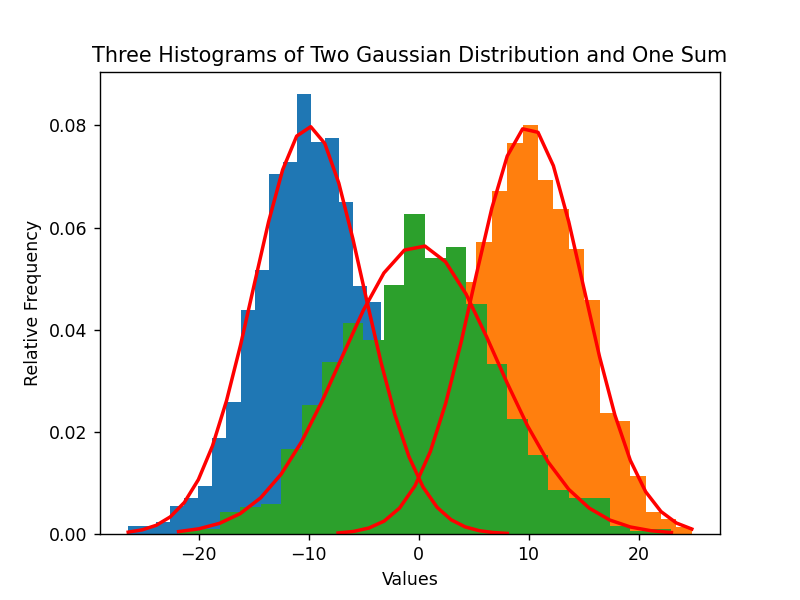

In [2]:
mu1, sigma1 = -10, 5 # Set mean and standard deviation

# The first set of 1000 samples
np.random.seed(5) # Make sure we have consistent random results every time
set1 = np.random.normal(loc = mu1, scale = sigma1, size = 1000)
count, bins, ignored = plt.hist(set1, density=True, bins = "auto")
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ),
         linewidth=2, color='r') # Create thr normal distribution line

plt.xlabel("Values")
plt.ylabel("Relative Frequency")
#plt.title("Histogram of Gaussian Distribution First Sample mu = -10 sigma = 5")
plt.show()

In [3]:
# The second set of 1000 samples
mu2, sigma2 = 10, 5 # Set mean and standard deviation

np.random.seed(15) # Make sure we have consistent random results every time
set2 = np.random.normal(loc = mu2, scale = sigma2, size = 1000)
count, bins, ignored = plt.hist(set2, density=True, bins = "auto")
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ),
         linewidth=2, color='r') # Create thr normal distribution line

plt.xlabel("Values")
plt.ylabel("Relative Frequency")
#plt.title("Histogram of Gaussian Distribution Second Sample mu = 10 sigma = 5")
plt.show()

In [4]:
# The sum of two 1000 samples from previous distributions
setSum = set1 + set2
muSum, sigmaSum = setSum.mean(), np.std(setSum)

count, bins, ignored = plt.hist(setSum, density=True, bins = "auto")
plt.plot(bins, 1/(sigmaSum * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - muSum)**2 / (2 * sigmaSum**2) ),
         linewidth=2, color='r') # Create the normal distribution line

plt.xlabel("Values")
plt.ylabel("Relative Frequency")
#plt.title("Histogram of Gaussian Distribution Sum of Samples 1 and 2 mu = 0 sigma = 5")
plt.title("Three Histograms of Two Gaussian Distribution and One Sum")
plt.show()

The two histograms of the two 1000 samples look quite normally distributed with the peak of the graph at around their respective means, namely -10 (blue histogram) and 10 (orange histogram). For the histogram of the sum of these two 1000 samples (green histogram), we can still see the normal curve from the summed distribution and a peak around 0, which is the sum of the means from the two underlying distribution. However, the count of values around 4 is slightly lower than what we expected, but this is just due to the randomness of the data samples collected. 

### 1 (b) Estimate the mean and the variance of the sum.
### Deliverables: written response, code

With both samples of 1000 randomly selected datapoints from the Gaussian distributions, the sum of both samples point by point would result in another **Gaussian distribution**.

The mean of the sum results from means from both samples added together, in this case, $muSum = mu1 + mu2 = -5 + 5 = 0$. 

The variance of sum results from variancess from both samples added together, in this case, $varSum = sigma1^2 + sigma2^2 = 5^2 + 5^2 = 25 + 25 = 50.$ 

The code below validates our expectation with the summed distribution. The mean is close to 0 and the variance is close to 50, which is how we compute the summed variance with summing both variances together.

In [5]:
# Define functions to calculate mean and variance of a given array
def compute_sample_mean(d_array):
    '''Compute the mean of a given array'''
    mean = 0
    for d in d_array:
        mean += d # Iterate over the 1d data and sum up all data points
    mean /= len(d_array) # Divide the sum by the length of the 1d data to get the mean
    return mean

def compute_sample_var(d_array):
    '''Compute the variance of a given array'''
    var = 0
    mean = compute_sample_mean(d_array)
    for d in d_array: # Iterate the 1d data
        var += (d - mean) ** 2 # Add up the squared the deviations of each data point with the mean
    var /= (len(d_array) - 1) # Divide the sum by the length of the 1d data
    return var

In [6]:
mean_sum = compute_sample_mean(setSum)
var_sum = compute_sample_var(setSum)
print('Our estimation using our own methods')
print('Mean estimate of the sum: ', round(mean_sum, 3))
print('Variance estimate of the sum: ', round(var_sum, 3))

Our estimation using our own methods
Mean estimate of the sum:  0.013
Variance estimate of the sum:  49.838


# Programming Question 2

## 2.  Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean and standard deviation of this gaussian using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation). 

### Deliverables: mean, standard deviation, code

In [7]:
mu_q2, sigma_q2 = 0, 5 # Set mean and standard deviation

np.random.seed(25) # Make sure we have consistent random results every time
sample_q2 = np.random.normal(loc = mu_q2, scale = sigma_q2, size = 25000)

def compute_sample_sd(d_array):
    '''Compute the standard deviation of a given array'''
    sd = 0
    mean = compute_sample_mean(d_array)
    for d in d_array: # Iterate the 1d data
        sd += (d - mean) ** 2 # Add up the squared the deviations of each data point with the mean
    sd /= (len(d_array) - 1) # Divide the sum by the length of the 1d data - 1
    sd = sd ** (1/2) # Take the square root
    return sd

mean_q2 = compute_sample_mean(sample_q2) # Function defined in problem 1
std_q2 = compute_sample_var(sample_q2) ** (1/2) # Function defined in problem 1


print('Our estimation using our own methods')
print('Mean', round(mean_q2, 3))
print('Standard deviation', round(std_q2, 3))

print('\n\nMean and standard deviation form in-built funcitons')
print('Mean of the sum: ', round(sample_q2.mean(), 3))
print('Standard Deviation of the sum: ', round(sample_q2.std(), 3))

Our estimation using our own methods
Mean -0.007
Standard deviation 5.009


Mean and standard deviation form in-built funcitons
Mean of the sum:  -0.007
Standard Deviation of the sum:  5.009


# Programming Question 3

## Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution (Xi Yi) ~N ((-5 5), (20 .8 .8 30))

## Then, estimate the mean and covariance matrix for this multi-dimensional data using elemenetary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

### Deliverables: mean, covariance matrix, code

In [8]:
np.random.seed(25)
# Set parameters
means = [-5, 5] # Set the mean vector
cov_mat = [[20,.8],[.8,30]] # Set the covavriance matrix

n = 10000
samples = np.random.multivariate_normal(means, cov_mat, (1, n))

xi = samples.transpose()[0]
yi = samples.transpose()[1]

mean_xi = np.sum(xi) / n
mean_yi = np.sum(yi) / n

mean = [round(mean_xi, 2), round(mean_yi, 2)]

print("Mean: \n", mean)

variance_x = round(np.sum((xi - mean_xi)**2) / (n-1), 2)
variance_y = round(np.sum((yi - mean_yi)**2) / (n-1), 2)

covariance = round(np.sum((xi - mean_xi)*(yi - mean_yi)) / (n-1), 2)
covariance_matrix = np.array([[variance_x, covariance], [covariance, variance_y]])

print("Covariance: \n", covariance_matrix)

Mean: 
 [-5.04, 5.03]
Covariance: 
 [[19.85  0.98]
 [ 0.98 30.47]]


In [9]:
# Check if our covariance matrix output matches the in-built function
df = pd.DataFrame(samples[0], columns = ['xi', 'yi']) # Put samples into dataframe form
round(df.cov(), 2)

,xi,yi
xi,19.85,0.98
yi,0.98,30.47


# Programming Question 4

## (Introduction to Data exploration) Download from Canvas/Files the dataset PatientData.csv.

## Each row is a patient and the last column is the condition that the patient has. Do data exploration using Pandas and other visualization tools to understand what you can about the dataset. For example:

### 4 (a) How many patients and how many features are there?

In [10]:
df = pd.read_csv('PatientData.csv', header=None) # No header for this file
df.shape

(452, 280)

There are 452 patients and 280 features.

### 4 (b) What is the meaning of the first 4 features? See if you can understand what they mean.

In [11]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10


There are no clear labels for the features in the file. However, we could guess the labels for the features by observing the data. 

In [12]:
df[0].describe()

count    452.000000
mean      46.471239
std       16.466631
min        0.000000
25%       36.000000
50%       47.000000
75%       58.000000
max       83.000000
Name: 0, dtype: float64

**The first feature could be the age.** The mean of this feature is around 46, the standard deviation is around 16 with a max of 83. Age looks like a good fit for these statistics.  

In [13]:
df[1].value_counts()

1    249
0    203
Name: 1, dtype: int64

**The second feature could be having the disease or not.** This feature only takes on two values 0 and 1. 0 could mean not having the disease and 1 could mean having the disease. 

In [14]:
df[2].describe()

count    452.000000
mean     166.188053
std       37.170340
min      105.000000
25%      160.000000
50%      164.000000
75%      170.000000
max      780.000000
Name: 2, dtype: float64

**The third feature could be systolic blood pressure.** Since the dataset includes data from hospital patients, it is expected to see these patients having a higher systolic blood pressure than the normal rate, which is usually under 120. 

In [15]:
df[3].describe()

count    452.000000
mean      68.170354
std       16.590803
min        6.000000
25%       59.000000
50%       68.000000
75%       79.000000
max      176.000000
Name: 3, dtype: float64

**The fourth feature could be diastolic blood pressure.** Again, since the dataset includes data from hospital patients, it is expected to see these patients having an abnormal diastolic blood pressure than the normal rate, which is usually under 80. In this case, it makes sense to have both blood pressure data captured as the third feature and the fourth feature in our dataframe. 

### 4 (c) Are there missing values? Replace them with the average of the corresponding feature column

In [16]:
df = df.replace('?', np.nan)
check_cols = df.isna().sum() # 1d array where the value is the number of no NaNs of the corresponding column
nan_cols = [x for x in range(len(check_cols)) if check_cols[x] != 0] 
# Any non 0 value in check_cols means that the corresponding index column has missing values
print('The columns that have missing values are: ')
nan_cols

The columns that have missing values are: 


[10, 11, 12, 13, 14]

In [17]:
check_cols.value_counts()

0      275
1        2
376      1
22       1
8        1
dtype: int64

The above value_counts tells us that there are 275 rows that have 0 NaNs (no missing values for those rows). 

There are 2 rows that only have 1 NaN.

There is 1 row that has 376 NaNs.

There is 1 row that has 22 NaNs.

And there is 1 row that has 8 NaNs. 

So we will fill in these 5 rows with their respective average of the feature column. 

In [18]:
df = df.apply(pd.to_numeric) # Make sure all cells are numeric so we could take the mean
all_means = df.apply(np.mean).tolist() # Get all the means of columns
means = [round(all_means[col],2) for col in nan_cols] # Store only the means of columns with missing values
means

[36.15, 48.91, 36.72, -13.59, 74.46]

In [19]:
for col in range(len(nan_cols)):
    df.iloc[:,nan_cols[col]] = df.iloc[:,nan_cols[col]].fillna(means[col])

print('Total number of NaNs left after filling NaNs with the corresponding means: ', df.isna().sum().sum())

Total number of NaNs left after filling NaNs with the corresponding means:  0


### 4 (d) How could you test which features strongly influence the patient condition and which do not?
### List what you think are the three most important features.
### Deliverables: written response, code (if any)

We observe the distribution of our proposed target feature as patients having the disease 1 or not having the disease 0. 

We propose three different ways to find the most important features. There are several tools we could use to help deciding which features are most important.  

We talked in class at length about using decision trees, adjusting branches to narrow and change our results.  We could also use a correlation matrix; if we consider that the 2nd column (binary value) is the condition of the patient (0 for no condition, 1 for has a condition), we could test the correlation of 1 (or more) other feature. If we have a significant correlation, we can highlight that feature for a future study. 


Another way to do that would be clusterizing features that might influence (correlate) to that particular << to be optimized >> column (in our example, the column 2). Setting a thresold of correlation (i.e. higher than or lower than) can also help in defining what are the characteristics (features) that a patient might have that influence << the most >> that particular condition.  There are others tools available too, such as regression coefficients, eigenvalue eigenvectors, and t testing.

The third possible approach is by performing two-sample t-tests on each the feature column data from labels 0 and 1, and see if the p-values are significant and determine the deciding column features. Below is the possible implementation and deciding the three most important features. 

In [20]:
df[1].value_counts()/df.shape[0]*100

1    55.088496
0    44.911504
Name: 1, dtype: float64

Around 45% of the data has label 0 and 55% of the data has label 1

In [21]:
# Create an array of arrays of each column feature for each label group
df_label0 = df.loc[df[1] == 0].transpose().to_numpy()
df_label1 = df.loc[df[1] == 1].transpose().to_numpy()

# Use the scipy stats library to do two sample t-test on all the column features between labels 0 and 1
import scipy.stats as stats

t_stats_all = []
p_value_all = []
feature_count =  len(df_label0) # Store how many features to do the two sample t-tests

for i in range(feature_count): # Perform two sample t-test on each column feature against the two labels
    if i != 1: # Skip our target feature, which is column 1
        # Store the results of t-statistics and p-values of all the two sample t-tests
        t_stats_all.append(stats.ttest_ind(a = df_label0[i], b = df_label1[i], equal_var = True).statistic)
        p_value_all.append(stats.ttest_ind(a = df_label0[i], b = df_label1[i], equal_var = True).pvalue)

# Get the indices of top three smallest p-values
inds = np.argpartition(p_value_all,3)[:3] 

In [22]:
# Return column index, the t-statistic from two-sample t-test, and the p-values
[(i+1, round(t_stats_all[i], 2), p_value_all[i]) for i in inds] 

[(4, 7.6, 1.789467395297464e-13),
 (252, -6.05, 3.0729066466618933e-09),
 (190, 5.55, 4.958116357207944e-08)]

The approach we took to test which features strongly influence the patient condition and which do not is by running the two sample t-test for each feature label group. Then we got the three indicies regarding the smallest p-values. These three p-values are less than 0.05, which means that these t-tests are significant. We can reject the null hypothesis that the data of these particular feature from both label groups are the same, concluding that there is statistically significant differences with these features among these two label groups. 

The first three column features are indicies **4, 190, and 252**.   

# Writing Question 1

## 1. (Linear Algebra refresh): Consider the vectors v1 = [1, 1, 1] and v2 = [1, 0, 0]. These two vectors define a 2-dimensional subspace of R^3. Project the points P1 = [3, 3, 3], P2 = [1, 2, 3], P3 = [0, 0, 1] on this subspace. Write down the coordinates of the three projected points. (You can use numpy or a calculator to do arithmetic if you want).
### Deliverables: written response, code (if any)

In [23]:
v1 = [1,1,1]
v2 = [1,0,0]
A = pd.DataFrame(data = {'0': v1, '1': v2})
A_trans = A.transpose()
A_trans_A = A_trans.dot(A)
inv = pd.DataFrame(np.linalg.pinv(A_trans_A), A_trans_A.columns, A_trans_A.index)
A_inv_A_trans = A.dot(inv).dot(A_trans)

In [24]:
point1 = [3, 3, 3]
point2 = [1, 2, 3]
point3 = [0, 0, 1]
print("Below are the coordinates of the three projected points")
print('P1', np.round(np.array(A_inv_A_trans.dot(point1)), decimals=1))
print('P2',np.round(np.array(A_inv_A_trans.dot(point2)), decimals=1))
print('P3',np.round(np.array(A_inv_A_trans.dot(point3)), decimals=1))

Below are the coordinates of the three projected points
P1 [3. 3. 3.]
P2 [1.  2.5 2.5]
P3 [0.  0.5 0.5]


<IPython.core.display.Javascript object>


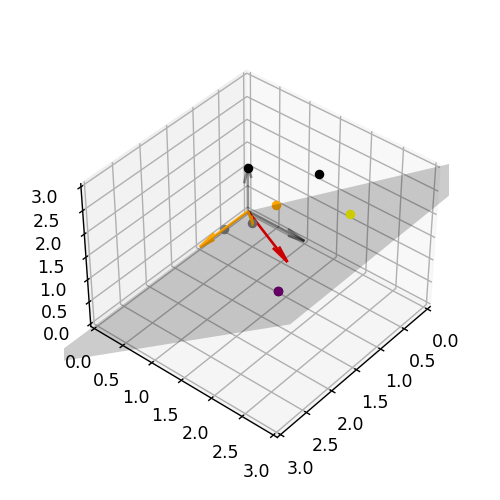

In [25]:
fig = plt.figure(figsize=(4, 4))
ax = fig.gca(projection='3d')
ax.set_xlim3d(0, 3)
ax.set_ylim3d(0, 3)
ax.set_zlim3d(0, 3)

v1 = np.array([1,1,1])  
v2 = np.array([1,0,0])  
vN = np.cross(v1,v2)
point1 = np.array([v1[0]/2, v1[1]/2, v1[2]/2])
point2 = np.array([v2[0]/2, v2[1], v2[2]])

# Plot the vectors
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], length = 1, normalize = True, color='orange')
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], length = 1, normalize = True, color='orange')
ax.quiver(0, 0, 0, vN[0], vN[1], vN[2], length = 1, normalize = True, color='red')
ax.quiver(0, 0, 0, 0, 1, 0, length = 1, normalize = True, alpha=0.4, color='black')
ax.quiver(0, 0, 0, 0, 0, 1, length = 1, normalize = True, alpha=0.4, color='black')

# Plot a point
ax.scatter(point1[0], point1[1], point1[2],  color='gray')
ax.scatter(point2[0], point2[1], point2[2],  color='gray')

# Create x,y
xx, yy = np.meshgrid(range(5), range(5))

# Calculate corresponding z
z = -vN[0]*xx/vN[2] + vN[0]*point1[0]/vN[2] - vN[1]*yy/vN[2] + vN[1]*point1[1]/vN[2] + vN[2]*point1[2]/vN[2]

# New points on the plane
P1 = np.array([3,3,3])
P2 = np.array([1,2,3])
P3 = np.array([0,0,1])
ax.scatter(P1[0], P1[1], P1[2],  color='black')
ax.scatter(P2[0], P2[1], P2[2],  color='black')
ax.scatter(P3[0], P3[1], P3[2],  color='black')

# Generalization of the point to be
# Qx = Pn[0] + vN[0]*t
# Qy = Pn[1] + vN[1]*t
# Qz = Pn[2] + vN[2]*t
# projection = np.array([q1, q2, q3])

# Replacing the values in the plane formula
t1 = vN[2]*(-P1[2] -vN[0]*P1[0]/vN[2] + vN[0]*point1[0]/vN[2] - vN[1]*P1[1]/vN[2] + vN[1]*point1[1]/vN[2] + vN[2]*point1[2]/vN[2])/(vN[0]*vN[0] + vN[2]*vN[2] + vN[1]*vN[1])
# print(t1)

# The point P1 we want to project
q1 = P1[0] + vN[0]*t1
q2 = P1[1] + vN[1]*t1
q3 = P1[2] + vN[2]*t1
projection = np.array([q1, q2, q3])
ax.scatter(q1, q2, q3,  color='purple')

# Replacing the values in the plane formula
t2 = vN[2]*(-P2[2] -vN[0]*P2[0]/vN[2] + vN[0]*point1[0]/vN[2] - vN[1]*P2[1]/vN[2] + vN[1]*point1[1]/vN[2] + vN[2]*point1[2]/vN[2])/(vN[0]*vN[0] + vN[2]*vN[2] + vN[1]*vN[1])
# print(t2)

# The point P2 we want to project
w1 = P2[0] + vN[0]*t2
w2 = P2[1] + vN[1]*t2
w3 = P2[2] + vN[2]*t2
projection = np.array([w1, w2, w3])
ax.scatter(w1, w2, w3,  color='yellow')

# Replacing the values in the plane formula
t3 = vN[2]*(-P3[2] -vN[0]*P3[0]/vN[2] + vN[0]*point1[0]/vN[2] - vN[1]*P3[1]/vN[2] + vN[1]*point1[1]/vN[2] + vN[2]*point1[2]/vN[2])/(vN[0]*vN[0] + vN[2]*vN[2] + vN[1]*vN[1])
# print(t3)

# The point P2 we want to project
e1 = P3[0] + vN[0]*t3
e2 = P3[1] + vN[1]*t3
e3 = P3[2] + vN[2]*t3
projection = np.array([e1, e2, e3])
ax.scatter(e1, e2, e3,  color='orange')


# Plot the surface
ax.plot_surface(xx, yy, z, color='black', alpha=0.2)

# Rotate the axes and update
ax.view_init(40,40)
plt.show()

# Writing Question 2

## 2.  (Extra credit +10pts) Consider a coin such that probability of heads is 2/3. Suppose you toss the coin 100 times. Estimate the probability of getting 50 or fewer heads. You can do this in a variety of ways. One way is to use the Central Limit Theorem. Be explicit in your calculations and tell us what tools you are using in these.
### Deliverables: written response and/or code used

In [26]:
heads = 50 # The most number of heads of the events we are interested in
prob = 2/3 # Probability of getting heads on a coin flip
trials = 100 # Total number of times to flip the unfair coin
agg_prob = 0 # Placeholder to add up probabilities of getting different number of heads
fact_100 = np.math.factorial(trials) # Store the factorial of total trial number, in this case 100!

for i in range(0, heads + 1): # Looping events from 0 heads to 50 heads
    
    combo = fact_100 / np.math.factorial(trials - i) / np.math.factorial(i) 
    # Calculate the number of ways of getting the number of heads out of total number of times flipped
    # This is mirroring the combination math operation, in this case, 100 choose i
    
    cur_prob = combo * prob ** i * (1 - prob) ** (trials - i)
    # cur_prob tells us the probability of flipping i heads out of 100 tosses (order of the heads does not matter)
    
    agg_prob += cur_prob # Add up all the probabilities of events with different head counts

print(round(agg_prob*100, 3), '%')

0.042 %


The adopted approach to calculate the desired probability is by adding all the individual probabilities up from getting 0 heads in 100 coin tosses all the way to getting 50 heads in the tosses. 

In the for loop, the **combo** variable captures the number of ways the number of heads can appear in the 100 coin tosses while order of the heads does not matter. The combo variable calculates combinations of **100 Choose i**, where i being the number of heads in the coin tosses. 

$$combo = _{100}C_{i} = \frac{100!}{i! (100-i)!}$$

*Note that the value of 100! appears on the top of the fraction is stored as a variable **fact_100** to avoid calculating this number for all the 51 events we are interested in.* 

Then the **cur_prob** variable calculates the probability for flipping i heads out of 100 coin tosses, which is the number of ways i heads can appear in the 100 coin tosses multiplied by the probability of observing i heads with each probability of 2/3 in each toss and observing (100 - i) tails with the probability of $$\frac{1}{3} = (1 - \frac{2}{3})$$. 


Below is the general formula for flipping i heads out of 100 coin tosses with 2/3 probability of getting heads:
$$ \frac{100!}{i! (100-i)!} * \frac{2}{3} ^ {i} * \frac{1}{3} ^ {100 - i}$$


Then by adding all the cur_probs up for each for loop iteration to the **agg_prob** variable, we will get the desired output. In this case, the probability is **around 0.042%**. 